In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df_2021 = pd.read_csv("TN_2021_daily.csv")
df_2022 = pd.read_csv("TN_2022_daily.csv")
df_2023 = pd.read_csv("TN_2023_daily.csv")
df_2024 = pd.read_csv("TN_2024_daily.csv")

In [3]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datetime (UTC)                            365 non-null    object 
 1   Country                                   365 non-null    object 
 2   Zone name                                 365 non-null    object 
 3   Zone id                                   365 non-null    object 
 4   Carbon intensity gCO₂eq/kWh (direct)      365 non-null    float64
 5   Carbon intensity gCO₂eq/kWh (Life cycle)  365 non-null    float64
 6   Carbon-free energy percentage (CFE%)      365 non-null    float64
 7   Renewable energy percentage (RE%)         365 non-null    float64
 8   Data source                               365 non-null    object 
 9   Data estimated                            365 non-null    bool   
 10  Data estimation method                

In [4]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datetime (UTC)                            365 non-null    object 
 1   Country                                   365 non-null    object 
 2   Zone name                                 365 non-null    object 
 3   Zone id                                   365 non-null    object 
 4   Carbon intensity gCO₂eq/kWh (direct)      365 non-null    float64
 5   Carbon intensity gCO₂eq/kWh (Life cycle)  365 non-null    float64
 6   Carbon-free energy percentage (CFE%)      365 non-null    float64
 7   Renewable energy percentage (RE%)         365 non-null    float64
 8   Data source                               365 non-null    object 
 9   Data estimated                            365 non-null    bool   
 10  Data estimation method                

In [5]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datetime (UTC)                            365 non-null    object 
 1   Country                                   365 non-null    object 
 2   Zone name                                 365 non-null    object 
 3   Zone id                                   365 non-null    object 
 4   Carbon intensity gCO₂eq/kWh (direct)      365 non-null    float64
 5   Carbon intensity gCO₂eq/kWh (Life cycle)  365 non-null    float64
 6   Carbon-free energy percentage (CFE%)      365 non-null    float64
 7   Renewable energy percentage (RE%)         365 non-null    float64
 8   Data source                               365 non-null    object 
 9   Data estimated                            365 non-null    bool   
 10  Data estimation method                

In [6]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datetime (UTC)                            366 non-null    object 
 1   Country                                   366 non-null    object 
 2   Zone name                                 366 non-null    object 
 3   Zone id                                   366 non-null    object 
 4   Carbon intensity gCO₂eq/kWh (direct)      366 non-null    float64
 5   Carbon intensity gCO₂eq/kWh (Life cycle)  366 non-null    float64
 6   Carbon-free energy percentage (CFE%)      366 non-null    float64
 7   Renewable energy percentage (RE%)         366 non-null    float64
 8   Data source                               366 non-null    object 
 9   Data estimated                            366 non-null    bool   
 10  Data estimation method                

In [7]:
#Merge all years into one DataFrame
df = pd.concat([df_2021, df_2022, df_2023, df_2024])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Datetime (UTC)                            1461 non-null   object 
 1   Country                                   1461 non-null   object 
 2   Zone name                                 1461 non-null   object 
 3   Zone id                                   1461 non-null   object 
 4   Carbon intensity gCO₂eq/kWh (direct)      1461 non-null   float64
 5   Carbon intensity gCO₂eq/kWh (Life cycle)  1461 non-null   float64
 6   Carbon-free energy percentage (CFE%)      1461 non-null   float64
 7   Renewable energy percentage (RE%)         1461 non-null   float64
 8   Data source                               1461 non-null   object 
 9   Data estimated                            1461 non-null   bool   
 10  Data estimation method                    

In [8]:
df.head()

Datetime (UTC)  Country Zone name Zone id  \
0  2021-01-01 00:00:00  Tunisia   Tunisia      TN   
1  2021-01-02 00:00:00  Tunisia   Tunisia      TN   
2  2021-01-03 00:00:00  Tunisia   Tunisia      TN   
3  2021-01-04 00:00:00  Tunisia   Tunisia      TN   
4  2021-01-05 00:00:00  Tunisia   Tunisia      TN   

   Carbon intensity gCO₂eq/kWh (direct)  \
0                                364.82   
1                                351.47   
2                                348.42   
3                                359.15   
4                                361.84   

   Carbon intensity gCO₂eq/kWh (Life cycle)  \
0                                    483.29   
1                                    466.01   
2                                    462.07   
3                                    475.96   
4                                    479.43   

   Carbon-free energy percentage (CFE%)  Renewable energy percentage (RE%)  \
0                                  1.40                               1.40   
1                                  5.01                               5.01   
2                                  5.83                               5.83   
3                                  2.93                               2.93   
4                                  2.21                               2.21   

                           Data source  Data estimated  \
0  EMBER + Electricity Maps Estimation            True   
1  EMBER + Electricity Maps Estimation            True   
2  EMBER + Electricity Maps Estimation            True   
3  EMBER + Electricity Maps Estimation            True   
4  EMBER + Electricity Maps Estimation            True   

                 Data estimation method  
0  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
1  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
2  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
3  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
4  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL

In [9]:
df.tail()

Datetime (UTC)  Country Zone name Zone id  \
361  2024-12-27 00:00:00  Tunisia   Tunisia      TN   
362  2024-12-28 00:00:00  Tunisia   Tunisia      TN   
363  2024-12-29 00:00:00  Tunisia   Tunisia      TN   
364  2024-12-30 00:00:00  Tunisia   Tunisia      TN   
365  2024-12-31 00:00:00  Tunisia   Tunisia      TN   

     Carbon intensity gCO₂eq/kWh (direct)  \
361                                360.65   
362                                363.34   
363                                368.11   
364                                367.54   
365                                359.82   

     Carbon intensity gCO₂eq/kWh (Life cycle)  \
361                                    477.89   
362                                    481.38   
363                                    487.56   
364                                    486.81   
365                                    476.82   

     Carbon-free energy percentage (CFE%)  Renewable energy percentage (RE%)  \
361                                  2.53                               2.53   
362                                  1.80                               1.80   
363                                  0.51                               0.51   
364                                  0.67                               0.67   
365                                  2.75                               2.75   

                             Data source  Data estimated  \
361  EMBER + Electricity Maps Estimation            True   
362  EMBER + Electricity Maps Estimation            True   
363  EMBER + Electricity Maps Estimation            True   
364  EMBER + Electricity Maps Estimation            True   
365  EMBER + Electricity Maps Estimation            True   

                   Data estimation method  
361  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
362  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
363  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
364  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
365  ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL

In [10]:
# Convert date column to datetime

df["Datetime (UTC)"] = pd.to_datetime(df["Datetime (UTC)"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1461 entries, 0 to 365
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Datetime (UTC)                            1461 non-null   datetime64[ns]
 1   Country                                   1461 non-null   object        
 2   Zone name                                 1461 non-null   object        
 3   Zone id                                   1461 non-null   object        
 4   Carbon intensity gCO₂eq/kWh (direct)      1461 non-null   float64       
 5   Carbon intensity gCO₂eq/kWh (Life cycle)  1461 non-null   float64       
 6   Carbon-free energy percentage (CFE%)      1461 non-null   float64       
 7   Renewable energy percentage (RE%)         1461 non-null   float64       
 8   Data source                               1461 non-null   object        
 9   Data estimated                      

In [11]:
#ensure chronological order
df = df.sort_values("Datetime (UTC)")

In [12]:
df = df.set_index("Datetime (UTC)")

In [13]:
df.head(2)

Country Zone name Zone id  \
Datetime (UTC)                              
2021-01-01      Tunisia   Tunisia      TN   
2021-01-02      Tunisia   Tunisia      TN   

                Carbon intensity gCO₂eq/kWh (direct)  \
Datetime (UTC)                                         
2021-01-01                                    364.82   
2021-01-02                                    351.47   

                Carbon intensity gCO₂eq/kWh (Life cycle)  \
Datetime (UTC)                                             
2021-01-01                                        483.29   
2021-01-02                                        466.01   

                Carbon-free energy percentage (CFE%)  \
Datetime (UTC)                                         
2021-01-01                                      1.40   
2021-01-02                                      5.01   

                Renewable energy percentage (RE%)  \
Datetime (UTC)                                      
2021-01-01                                   1.40   
2021-01-02                                   5.01   

                                        Data source  Data estimated  \
Datetime (UTC)                                                        
2021-01-01      EMBER + Electricity Maps Estimation            True   
2021-01-02      EMBER + Electricity Maps Estimation            True   

                              Data estimation method  
Datetime (UTC)                                        
2021-01-01      ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL  
2021-01-02      ESTIMATED_GENERAL_PURPOSE_ZONE_MODEL

In [14]:
carbon = df["Carbon intensity gCO₂eq/kWh (direct)"]

In [15]:
carbon.head()

Datetime (UTC)
2021-01-01    364.82
2021-01-02    351.47
2021-01-03    348.42
2021-01-04    359.15
2021-01-05    361.84
Name: Carbon intensity gCO₂eq/kWh (direct), dtype: float64

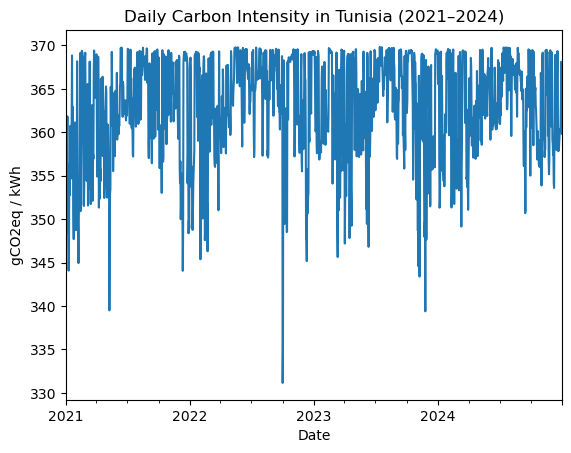

In [16]:
carbon.plot()
plt.title("Daily Carbon Intensity in Tunisia (2021–2024)")
plt.xlabel("Date")
plt.ylabel("gCO2eq / kWh")
plt.show()

In [17]:
decomp = seasonal_decompose(carbon, model="additive", period=365)
decomp.plot()
plt.show()

In [18]:
result = adfuller(carbon)

p_value = result[1]

print("p-value:", p_value)

if p_value < 0.05:
    print("The series is stationary")
else:
    print("The series is non-stationary")


p-value: 3.613089947143277e-11
The series is stationary


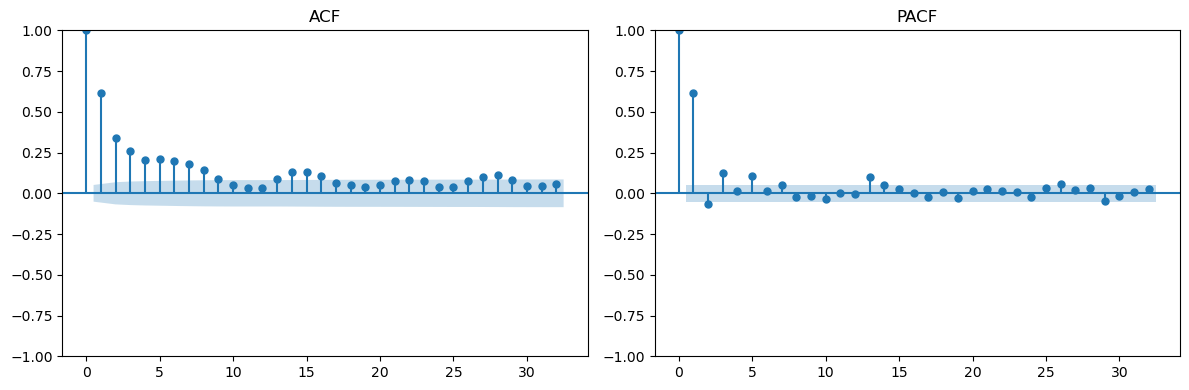

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plot_acf(carbon, ax=plt.gca())
plt.title("ACF")

plt.subplot(1,2,2)
plot_pacf(carbon, ax=plt.gca())
plt.title("PACF")

plt.tight_layout()
plt.show()

In [20]:
from statsmodels.tsa.arima.model import ARIMA

ar1_model = ARIMA(carbon, order=(1,0,0))
ar1_result = ar1_model.fit()

print(ar1_result.summary())

                                        SARIMAX Results                                         
Dep. Variable:     Carbon intensity gCO₂eq/kWh (direct)   No. Observations:                 1461
Model:                                   ARIMA(1, 0, 0)   Log Likelihood               -4304.639
Date:                                  Sun, 14 Dec 2025   AIC                           8615.278
Time:                                          21:06:41   BIC                           8631.139
Sample:                                      01-01-2021   HQIC                          8621.195
                                           - 12-31-2024                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        362.7989      0.372    975.346      0.000     362.070

C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [21]:
ma1_model = ARIMA(carbon, order=(0,0,1))
ma1_result = ma1_model.fit()

print(ma1_result.summary())

C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                         
Dep. Variable:     Carbon intensity gCO₂eq/kWh (direct)   No. Observations:                 1461
Model:                                   ARIMA(0, 0, 1)   Log Likelihood               -4352.961
Date:                                  Sun, 14 Dec 2025   AIC                           8711.921
Time:                                          21:06:41   BIC                           8727.782
Sample:                                      01-01-2021   HQIC                          8717.838
                                           - 12-31-2024                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        362.7991      0.224   1618.927      0.000     362.360

In [22]:
arma11_model = ARIMA(carbon, order=(1,0,1))
arma11_result = arma11_model.fit()

print(arma11_result.summary())

C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                        SARIMAX Results                                         
Dep. Variable:     Carbon intensity gCO₂eq/kWh (direct)   No. Observations:                 1461
Model:                                   ARIMA(1, 0, 1)   Log Likelihood               -4299.350
Date:                                  Sun, 14 Dec 2025   AIC                           8606.700
Time:                                          21:06:41   BIC                           8627.847
Sample:                                      01-01-2021   HQIC                          8614.588
                                           - 12-31-2024                                         
Covariance Type:                                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        362.7991      0.339   1070.198      0.000     362.135

In [ ]:
sarima_model = ARIMA(
    carbon,
    order=(1,0,1),
    seasonal_order=(1,0,0,365)
)

sarima_result = sarima_model.fit()
print(sarima_result.summary())


C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ayari\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
"""sarima_model = ARIMA(
    carbon,
    order=(1,0,1),
    seasonal_order=(1,0,0,7)
)

sarima_result = sarima_model.fit()
print(sarima_result.summary())"""

In [ ]:
# Split data
train = carbon[:'2023-12-31']
test  = carbon['2024-01-01':]

print(train.shape, test.shape)

In [ ]:
"""model = ARIMA(
    train,
    order=(1,0,1),
    seasonal_order=(1,0,0,7)
)

model_fit = model.fit()"""


In [ ]:
forecast = model_fit.forecast(steps=len(test))
forecast.index = test.index

In [ ]:
plt.figure(figsize=(12,4))

plt.plot(train.index, train, label="Train", color="blue")
plt.plot(test.index, test, label="Real", color="green")
plt.plot(forecast.index, forecast, label="Forecast", color="red")

plt.legend()
plt.title("SARIMA Forecast vs Real Values (Daily Carbon Intensity)")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(test, forecast))
mae  = mean_absolute_error(test, forecast)

print("RMSE:", rmse)
print("MAE:", mae)